# FigureA7. Heterogeneous effects by distance to the Yangtze River

In [1]:
cd ..

/Users/chengjun/OneDrive - 南京大学/10papers/causal_inference_references/RebelCa
> nal157781-V1/Program


In [2]:
cd ..

/Users/chengjun/OneDrive - 南京大学/10papers/causal_inference_references/RebelCa
> nal157781-V1


In [3]:
adopath ++ "/Users/chengjun/Library/Application Support/Stata/ado/plus/"


  [1]              "/Users/chengjun/Library/Application Support/Stata/ado/plus/"
  [2]  (BASE)      "/Applications/Stata/ado/base/"
  [3]  (SITE)      "/Applications/Stata/ado/site/"
  [4]              "."
  [5]  (PERSONAL)  "/Users/chengjun/Documents/Stata/ado/personal/"
  [6]  (PLUS)      "/Users/chengjun/Library/Application Support/Stata/ado/plus/"
  [7]  (OLDPLACE)  "~/ado/"
  [8]              "/opt/anaconda3/lib/python3.8/site-packages/stata_kernel/ado"


In [21]:
**************************************************************************
*** Set up
**************************************************************************
use "Data/Final/rebellion.dta", clear
run "Program/Analysis/generalsetup.do"
graph set window fontface "Cambria"
set scheme s2color




not available in non-GUI version



In [22]:

**************************************************************************
*** FigureA7. Heterogeneous effects by distance to the Yangtze River
**************************************************************************
mat result = (., ., ., .)
capture program drop svresult
program define svresult
    args distance_yangtze
    qui {
        reghdfe $Y $X $ctrls ///
        if distance_yangtze >= `distance_yangtze' - 100 & distance_yangtze < `distance_yangtze', ///
        a(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year i.prefid#c.year) cl(OBJECTID)
        scalar b = _b[inter]
        scalar se = _se[inter]
        scalar uci_95 = _b[inter] + invttail(e(df_r), 0.025)*se
        scalar lci_95 = _b[inter] - invttail(e(df_r), 0.025)*se
        mat result = (result\ `distance_yangtze', b, lci_95, uci_95)
    }
end



In [23]:
_dots 0
forvalues i = 100(100)400 {
    svresult `i'
    _dots `i' 0
}



----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5 

.   100
.   200
.   300
.   400


In [25]:

clear
svmat result





number of observations will be reset to 5
Press any key to continue, or Break to abort
--more--


In [26]:
drop in 1

(1 observation deleted)


In [27]:
rename result1 dist
rename result2 coef
rename result3 lci_95
rename result4 rci_95
export delimited "Data/Interim/distance_yangtze.txt", delimit(tab) replace






file Data/Interim/distance_yangtze.txt saved


In [28]:
import delimited using "Data/Interim/distance_yangtze.txt", clear
#d ;
twoway 
(rcap rci_95 lci_95 dist, lcolor(Gray) lpattern(dash) lwidth(thin) msize(*0.75))
(scatter coef dist, color(gs0) msize(*0.75))
,
ytitle("Coefficients", size(*0.9)) 
xtitle("Distance to the Yangtze river", size(*0.9) margin(medsmall))
yline(0(0.05)0.3, lstyle(grid) lwidth(thin) lcolor("235 235 235"))
yline(0, lpattern(dash) lcolor("128 0 0"))
xline(100(50)400, lstyle(grid) lwidth(thin) lcolor("235 235 235"))
ylabel(0(0.1)0.3, angle(0) format(%5.1f) labsize(*0.85))
xlabel(, labsize(*0.85)) 
graphregion(fcolor(gs16) lcolor(gs16)) 
plotregion(lcolor("white") lwidth(*0.9))
legend(off)
;
#d cr
graph export "Results/Figures/figureA7.pdf", replace


(encoding automatically selected: ISO-8859-1)
(4 vars, 4 obs)

(note:  named style Gray not found in class color, default attributes used)
(note:  named style Gray not found in class color, default attributes used)

file /Users/chengjun/.stata_kernel_cache/graph.svg saved as SVG format
file /Users/chengjun/.stata_kernel_cache/graph.pdf saved as PDF format

file Results/Figures/figureA7.pdf saved as PDF format


In [29]:
graph export "Results/Figures/figureA7.png", replace

(file Results/Figures/figureA7.png not found)
file Results/Figures/figureA7.png written in PNG format


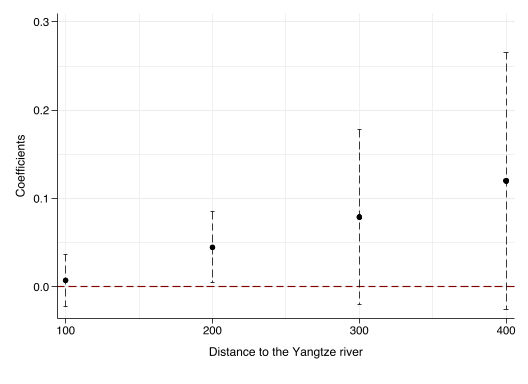

Note. The figure depicts the changes in rebellions before and after the 1826 reform by a county’s distance to the Yangtze River. The markers and capped spikes represent the OLS estimators and 95% confidence intervals. The dependent variable is the inverse hyperbolic sine of the number of rebellions normalized by population. The regression considers county and year fixed effects, pretreatment rebellions times year dummies, province-year fixed effects, and prefecture-specific year trends. Standard errors are clustered at the county level.

In [30]:
**************************************************************************
*** Write to Latex
**************************************************************************
file open f using "Results/Figures/figureA7.tex", write replace
file write f "\begin{figure}[p]\captionsetup{justification=centering,singlelinecheck=false,width=0.8\textwidth}" _n
file write f "\begin{center}" _n
file write f "\caption{Heterogeneous effects by distance to the Yangtze River}  " _n
file write f "\includegraphics[width=.8\textwidth]{Figures/figureA7.pdf}\\ " _n
file write f "\end{center}" _n
file write f "\footnotesize{\textit{Note.} The figure depicts the changes in rebellions before and after the 1826 reform by a county's distance to the Yangtze River. "
file write f "The markers and capped spikes represent the OLS estimators and 95\% confidence intervals. "
file write f "The dependent variable is the inverse hyperbolic sine of the number of rebellions normalized by population. "
file write f "The regression considers county and year fixed effects, pretreatment rebellions times year dummies, province-year fixed effects, and prefecture-specific year trends. }"
file write f "Standard errors are clustered at the county level. "
file write f "\end{figure}" _n
file close f


(file Results/Figures/figureA7.tex not found)












